# Лабораторная работа 3
## Партин М. Ю
## А-13а-20
### Вариант 17

## Задание 3.1

Реализовать решение СЛАУ с помощью LU разложения и LU разложения по схеме частичного выбора. Решить систему небольшой размерности с возмущенной матрицей обоими методами, оценить погрешность и сравнить с теоретической оценкой. Проанализировать поведение  методов с ростом числа уравнений

По условии задания мой номер N = 17, K = 1 

**1 Реализация LU разложения**

Функция возвращает две матрицы L и U, не модифицируя A


Согласно теории, чтобы получить разложение матрицы с помощью LU разложения нам надо воспользоваться методом Гаусса

Пусть имеем квадратную матрицу A порядка n

$$ A = \left( \begin{array}{cccc}
                a_{11} & a_{12} & \ldots & a_{1n}\\
                a_{21} & a_{22} & \ldots & a_{2n}\\
                \vdots & \vdots & \ddots & \vdots\\
                a_{n1} & a_{n2} & \ldots & a_{nn}
                \end{array}
        \right)$$
        
Применив метод Гаусса мы получим верхнетреугольную матрицу вида

$$ \tilde A = \left( \begin{array}{cccc}
                \tilde a_{11} & \tilde a_{12} & \ldots & \tilde a_{1n}\\
                0 & \tilde a_{22} & \ldots & \tilde a_{2n}\\
                \vdots & \vdots & \ddots & \vdots\\
                0 & 0 & \ldots & \tilde a_{nn}
                \end{array}
        \right)$$
        
 Это и будет матрица $ U = \tilde A $
 
 
 Матрица L - нижнетреугольная получается из коэффициентов $ \mu_{2,1}, \mu_{2,2}, \ldots , \mu_{2,n}, \mu_{3,2}, \mu_{3,3}, \ldots, \mu_{3,n}, \ldots \mu_{n, n - 1} $. Эти коэффициенты используется в методе Гаусса и вычисляются по формуле 
 $ \mu_{i, j} = \frac{a_{i, j}}{a_{j, j}} $


$$ L = \left( \begin{array}{cccc}
                1 & 0 & \ldots & 0 & 0\\
                \mu_{21} & 1 & \ldots & 0 & 0\\
                \vdots & \vdots & \ddots & \vdots\\
                \mu_{n1} & \mu_{n2} & \ldots & \mu_{n, n - 1} & 1
                \end{array}
        \right) $$
        
Мы имеем необходмый теоретический материал для 1 реализации LU разложение сделаем это

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg

# Решения без модификации матрицы A
def LUDecompositionVersion1(A):
    n = A.shape[0]
    U = A # Чтобы не модифицировать матрицу A, копируем ее в U
    L = np.eye(n) # Делаем единичную матрицу n * n
    for k in range(n - 1):
            for i in range(k + 1, n):
                mu_i_k = U[i][k] / U[k][k]
                L[i][k] = mu_i_k
                U[i][k] -= U[k][k] * mu_i_k
                for j in range(k + 1, n):
                    U[i][j] -= (mu_i_k * U[k][j])
    return L, U

В качестве системы для проверки я возьму следующую матрицу

$$ A = \left( \begin{array}{cccc}
                9 & 0 & -11\\
                -9 & 8 & 6\\
                18 & -80 & 32
                \end{array}
        \right)$$
        
Для того, чтобы выполнить проверку применим функцию LUDecompositionVersion1(A) к данной матрице и перемножим две получившиеся матрицы, если результат их перемножения равен матрицы A, то функция работает корректно

In [3]:
A = np.array([[9, 0, -11], [-9, 8, 6], [18, -80, 32]])
L, U = LUDecompositionVersion1(A)
print("L = ", L)
print("U = ", U)

res = L @ U

print("res = ", res)

L =  [[  1.   0.   0.]
 [ -1.   1.   0.]
 [  2. -10.   1.]]
U =  [[  9   0 -11]
 [  0   8  -5]
 [  0   0   4]]
res =  [[  9.   0. -11.]
 [ -9.   8.   6.]
 [ 18. -80.  32.]]


Имеем следующее в результате перемножения мы получили ту же самую матрицу, следовательно можно рассчитывать на корректную работу
функции

Далее напишем функцию, которая решает СЛАУ $ Ax = b $ с помощью LU разложения

Запишем матрицу в виде LU разложение $ A = LU $

Тогда система уравнений принимает вид
$ LUx = b $ 

заменим $ y = Ux $

Решим систему $ Ly = b $

А затем уже систему $ Ux = y $

Реализуем это

In [4]:
def SolveSystemUsingLU(L, U, b):
    n = L.shape[0]
    y = np.zeros(n)
    #print("n = ", n)
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for j in range(0, i):
            y[i] -= L[i][j] * y[j]
            
    x = np.zeros(n)
    x[n - 1] = y[n - 1] / U[n - 1][n - 1]    
    for i in range(n - 2, -1, -1):
        cur = y[i]
        for j in range(n - 1, i, -1):
            cur -= U[i][j] * x[j]
        x[i] = cur / U[i][i]
    return x

Теперь проверим, что данный реализованный метод корректно работает
Для этого зададим следующий вектор b

$$ b = \left( \begin{array}{cccc}
                -13 \\
                11 \\
                2 \\
                \end{array}
        \right)$$
        
 И решим СЛАУ $ Ax = b $. Для матрицы A заданной выше. 
 
 Правильный ответ на данную задачу.
 
 
 $$ x = \left( \begin{array}{cccc}
                1 \\
                1 \\
                2 \\
                \end{array}
        \right)$$

In [5]:
# Задаем вектор b
A = np.array([[9, 0, -11], [-9, 8, 6], [18, -80, 32]])
b = np.array([-13, 11, 2])

x = SolveSystemUsingLU(L, U, b)

# Печатаем, получившийся вектор x
print("x = ", x)


x =  [1. 1. 2.]


Получили правильный ответ. Это может гарантировать работоспособность данной функции. Перейдем теперь ко второй реализации LU разложения

***

**2 Реализация LU разложения**

Реализовать решение СЛАУ с помощью $ LU $ разложения по схеме частичного выбора, функция должна модифицировать исходную матрицу $  A $

Схема частичного выбора основано на том, что на каждом k шаге мы выбираем ведущий элемент. Ведущий элемент - это элемент максимальный по модулю в k-ом столбце. Пусть, например, номер  соответствующей строки - $i_{k}$. Cтроки k и $ i_{k} $меняются местами и выполняется преобразование Гаусса. Этот дополнительный прием позволяет избежать нулевых ведущих элементов и ведет к вычислительной устойчивости метода.

Так как мы меняем строки матрицы местами, то нам необходимо будет также переставлять строки вектора $ b $ и не забывать при каждый перестановке переставлять строки матрицы $ L $

In [6]:
# Поиск максимального элемента по модулю k - ом столбце матрицы A
def MaxElementInRow(A, k):
    max_item = abs(A[k][k])
    n = A.shape[0]
    for i in range(k + 1, n):
        if abs(A[i][k]) > max_item:
            max_item = abs(A[i][k])
         
    # При выходе из функции возвращаем номер строки, в которой был найден максимальный элемент
    # и сам этот элемент
    for i in range(k, n):
        if abs(A[i][k]) == max_item:
            return i
    

    
# Реализация второй версии LU разложения, которая модифицирует матрицу A
def LUDecompositionVersion2(A, b):
    n = A.shape[0]
    L = np.eye(n) # Делаем единичную матрицу n * n
    for k in range(n - 1):
        max_row = MaxElementInRow(A, k)
        # Меняем строки местами
        tmp = A[max_row].copy()
        A[max_row] = A[k]
        A[k] = tmp
        
        tmp = b[max_row].copy()
        b[max_row] = b[k]
        b[k] = tmp
        
        if k > 0: 
            for j in range(k, -1, -1):
                tmp = L[max_row][j].copy()
                L[max_row][j] = L[k][j]
                L[k][j] = tmp
        for i in range(k + 1, n):
            mu_i_k = A[i][k] / A[k][k]
            L[i][k] = mu_i_k
            A[i][k] -= A[k][k] * mu_i_k
            for j in range(k + 1, n):
                A[i][j] -= (mu_i_k * A[k][j])
    return L, A

Теперь проверим работу метода на той же самой системе

In [7]:
A = np.array([[9.0, 0.0, -11.0], [-9.0, 8.0, 6.0], [18.0, -80.0, 32.0]])
b = np.array([-13, 11, 2])
L, U = LUDecompositionVersion2(A, b)
x = SolveSystemUsingLU(L, U, b)
print("x = ", x)

x =  [1. 1. 2.]


Получили корректный ответ. Следовательно, мы имеем возможность расчитывать на корректность реализованного метода. Перейдем
к последней реализации $LU$ разложения

***

**3 реализация LU разложения**

Реализовать метод решения СЛАУ с помощью LU разложения по схеме частичного выбора без перестановки строк

Для того, чтобы реализовать алгоритм $ LU $ разложения без перестановки строк. Нам понадобятся матрицa перестановок $ P $

Перестановка строк $i$ и $k$ эквивалентна умножение на матрицу $P$, получаемую из единичной матрицы $E$ путем перестановки строк $i$ и $k$

То есть на выходе из $LU$ разложения мы будем возвращать кроме матриц $L$ и $U$ также матрицу $P$. Реализуем данный алгоритм

In [8]:
def LUDecompositionVersion3(A):
    n = A.shape[0]
    L = np.eye(n)
    P = np.eye(n)   
    for k in range(n - 1):
        P_k = np.eye(n)
        U_k = np.eye(n)
        L_k = np.eye(n)
        max_row = MaxElementInRow(A, k)
        P_k[max_row], P_k[k] = np.copy(P_k[k]), np.copy(P_k[max_row])
        A = P_k @ A
        for i in range(k + 1, n):
            mu_i_k = A[i][k] / A[k][k]
            U_k[i][k] = -mu_i_k
            L_k[i][k] = mu_i_k
        A = U_k @ A 
        P = P_k @ P
        L = L @ P_k @ L_k
    
    L = P @ L  
    return L, A, P


# Решение системы использование матриц L, U, P
def SolveSystemUsingLUP(L, U, P, b):
    
    n = L.shape[0]
    y = np.zeros(n)
    b = P @ b
    #print("n = ", n)
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for j in range(0, i):
            y[i] -= L[i][j] * y[j]
            
    x = np.zeros(n)
    x[n - 1] = y[n - 1] / U[n - 1][n - 1]    
    for i in range(n - 2, -1, -1):
        cur = y[i]
        for j in range(n - 1, i, -1):
            cur -= U[i][j] * x[j]
        x[i] = cur / U[i][i]
    return x

Проведем проверку метода также как у предыдущих двух реализациях

In [9]:
A = np.array([[9, 0, -11], [-9, 8, 6], [18, -80, 32]])
b = np.array([-13, 11, 2])
L, U, P = LUDecompositionVersion3(A)
print("L = ", L)
print("U = ", U)
print("P = ", P)
x = SolveSystemUsingLUP(L, U, P, b)
print("x = ", x)

L =  [[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [-0.5 -0.8  1. ]]
U =  [[ 18.  -80.   32. ]
 [  0.   40.  -27. ]
 [  0.    0.    0.4]]
P =  [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
x =  [1. 1. 2.]


Теперь решим систему, заданную в моем варианта

Элементы матрицы $A$ задаются по формуле $a_{ij} = \sin^{20 - j}{(i + 1)}$

Решим систему 5 на 5, заданной данной формулой, всеми 3 способами. Вектор $ x $ задается следующей формулой $x_i = 17$

При этом матрица $A$ является возмущенной. К одному из ее элементов следует прибавить $10^{-3}$

In [10]:
# Задаем матрицу A и вектор x
x = np.array([17] * 5)
A = np.ones((5, 5))
for i in range(5):
    for j in range(5):
        A[i][j] = (np.sin(i + 1))**(20-j)
        
A[0][0] += 10**(-3)
b = A @ x 


# Первая реализация LU разложения
L, U = LUDecompositionVersion1(A)
x1 = SolveSystemUsingLU(L, U, b)
print("x1 = ", x1)

x = np.array([17] * 5)
A = np.ones((5, 5))
for i in range(5):
    for j in range(5):
        A[i][j] = (np.sin(i + 1))**(20-j)
        
A[0][0] += 10**(-3)       

b = A @ x 

# Вторая реализация lU разложения
L, U = LUDecompositionVersion2(A, b)
x2 = SolveSystemUsingLU(L, U, b)
print("x2 = ", x2)

x = np.array([17] * 5)
A = np.ones((5, 5))
for i in range(5):
    for j in range(5):
        A[i][j] = (np.sin(i + 1))**(20-j)
        
A[0][0] += 10**(-3)
b = A @ x 

# Вторая реализация lU разложения
L, U, P = LUDecompositionVersion3(A)
x3 = SolveSystemUsingLUP(L, U, P, b)
print("x3 = ", x3)

x1 =  [17. 17. 17. 17. 17.]
x2 =  [17. 17. 17. 17. 17.]
x3 =  [17. 17. 17. 17. 17.]


Теперь вычислим погрешность вычисления вектора $x$ с помощью трех реализаций.

Относительная погрешность вектора $x $ может быть найдена по формуле $\delta x = \frac{\left|\left|x^{*} - x\right|\right|}{\left|\left|x^{*}\right|\right|}$

Где $x^{*}$ точное значение вектора, а $x$ приближеное. Будем проводить вычисления в бесконечной норме

In [11]:
# Бесконечная норма вектора
def InfinityNormVector(x):
    n = x.shape[0]
    max = abs(x[0])
    for i in range(n):
        if abs(x[i]) > max:
            max = abs(x[i])
    return max

def Deltax(x, x_approximate):
    return InfinityNormVector(x - x_approximate) / InfinityNormVector(x)

print("Первый вектор: ", Deltax(x, x1))
print("Второй вектор: ", Deltax(x, x2))
print("Третий вектор: ", Deltax(x, x3))

Первый вектор:  5.642545254565501e-15
Второй вектор:  5.851528412142001e-15
Третий вектор:  5.851528412142001e-15


**Вывод:** имеем пока, что приблизительно равные относительные погрешности. Сравним их с теоретической оценкой. Для этого
воспользуемся следующей формулой.

$$ \delta x \leq cond(A) (\delta A + \delta b)$$

где $ cond(A) $ - число обусловленности матрицы A, вычисляемое по формуле 
$ cond(A) = \left|\left|A\right|\right| \left|\left|A^{-1}\right|\right| $

Норму будем попрежнему считать бесконечную. Для того, чтобы посчитать число обусловленности матрицы
$A$ воспользуемся стандартной библиотечной функцией для поиска обратной матрицы $A^{-1} $. Относительную погрешность матрицы A найдем из того факта, что мы к ней прибавили число $ 10^{-3}$ Также поступим для вектора $b$

In [12]:
# Функция вычисления бесконечной нормы матрицы
def InfinityNormMatrix(A):
    max = 0
    n = A.shape[0]
    for i in range(n):
        sum = 0
        for j in range(n):
            sum += abs(A[i][j])
        if sum > max:
            max = sum
    return max

def DeltaA(A, A_approximate):
    return InfinityNormMatrix(A - A_approximate) / InfinityNormMatrix(A)

def CondA(A):
    return InfinityNormMatrix(A) * InfinityNormMatrix(linalg.inv(A))

A = np.ones((5, 5))
for i in range(5):
    for j in range(5):
        A[i][j] = (np.sin(i + 1))**(20-j)
A1 = A        
A1[0][0] += 10**(-3)

b = A @ x
b1 = A1 @ x

deltax = CondA(A1) * (Deltax(b, b1) + DeltaA(A, A1))
print("delta x theory = ", deltax)

delta x theory =  0.0


Имеем теоретическую погрешность слишком маленькую, скорее всего это не точно число ноль, но из-за особенностей машинной арифметики оно вышло равным нулю. Относительная погрешность, которую мы получили на практика также была близка к нулю. Следовательно мы можем быть скорее всего уверены в правильности реализованного алгоритма и найденного решения.


***

**Построение графиков**

Теперь построим графики погрешностей каждого из трех методов LU разложения. Элементы матрицы $A$ задаются по формуле $a_{ij} = \sin^{20 - j}{(i + 1)}$. $ n $ будет изменяться от 5 до 15.К элементу $ A[0][0] $ мы прибавляем $ 10^{-3} $. Вектор $ x $ задается следующим образом $ x_i = N $, N - номер варианта. N = 17. Для того, чтобы построить графики заведем массивы относительных погрешностей delta1, delta2, delta3 куда будем складывать относительную погрешность каждого из трех методов на каждом шаге алгоритма

In [13]:
# Функция генерирующая матрицу A необходимо размера
def MakeMatrix(n):
    A = np.eye(n)
    for i in range(n):
        for j in range(n):
            A[i][j] = (np.sin(i + 1))**(20-j)
    return A
            
delta1 = [] # Массив погрешностей первой реализации LU разложения
delta2 = [] # Массив погрешностей второй реализации LU разложения
delta3 = [] # Массив погрешностей третьей реализации LU разложения

N = 17

def MakeVectorX(n):
    x = np.ones(n)
    for i in range(n):
        x[i] = 17
    return x
        

for n in range(5, 16):
    A = MakeMatrix(n)
    x = MakeVectorX(n)
    A[0][0] += 10**(-3)
    b = A @ x
    L, U = LUDecompositionVersion1(A)
    x_sol = SolveSystemUsingLU(L, U, b)
    delta1.append(Deltax(x, x_sol))
    
    A = MakeMatrix(n)
    x = MakeVectorX(n)
    A[0][0] += 10**(-3)
    b = A @ x
    L, U = LUDecompositionVersion2(A, b)
    x_sol = SolveSystemUsingLU(L, U, b)
    delta2.append(Deltax(x, x_sol))
    
    A = MakeMatrix(n)
    x = MakeVectorX(n)
    A[0][0] += 10**(-3)
    b = A @ x
    L, U, P = LUDecompositionVersion3(A)
    x_sol = SolveSystemUsingLUP(L, U, P, b)
    delta3.append(Deltax(x, x_sol))

Завели массивы относительных погрешностей теперь построим графики

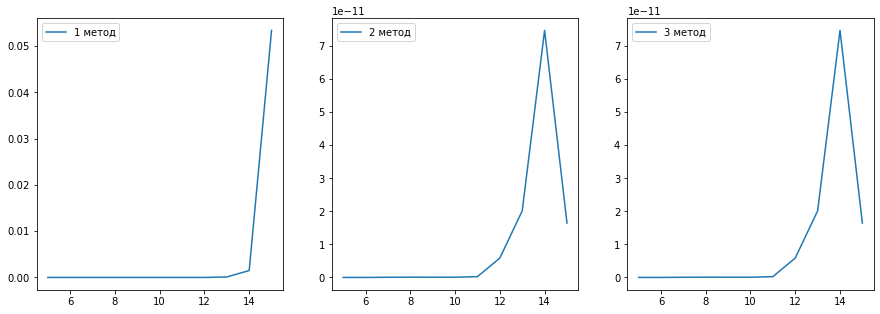

In [14]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(range(5, 16), delta1, label = '1 метод')
axs[1].plot(range(5, 16), delta2, label = '2 метод')
axs[2].plot(range(5, 16), delta2, label = '3 метод')
axs[0].legend()
axs[1].legend()
axs[2].legend()

**Вывод:** по графикам видно, что относительная погрешность первого метода растет быстрее тем у второго и третьего. Этот факт подчеркивает нам, что выбирая опорный элемент мы уменшаем погрешность вычисления вектора x, так как в данном случае у нас опорный элемент точно не будет равен нулю. Графики у второго и третьего метода идентичны, потому что выполняем мы там одни и те же действия. Только в разной форме. В одном случае мы осуществляем перестановку строк сразу, а в другом нет, используя для этого матрицу перестановок

## Задание 3.2

Дана система уравнений  $ Ax=b $  порядка $n$ с разреженной матрицей $A$. Решить систему прямым методом

В моем случае система задается следующим образом: на главной диагонали элементы равны  30 , в 4-ом столбце и на по-бочной диагонали элементы равны 10. Размер матрицы равен 30. В случае коллизий в матрице диагонали имеют приоритет над столбцами, главные диагонали – над побочными

Запишем матрицу этой системы в подробном виде

$$ A = \left(
\begin{array}{cccc}
30 & 0 & 0 & 10 & \ldots & 0 & 10 \\
0 & 30 & 0 & 10 & \ldots & 10 & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
10 & 0 & 0 & 10 & \ldots &  0 & 30\\
\end{array}
\right) $$

Запишем это в виде системы $ Ax = b $

$$  
\begin{cases}
        30x_1 + 10x_4 +  10x_{30} &= b_1 \\
        30x_2 + 10x_4 +  10x_{29} &= b_2 \\
        30x_3 + 10x_4 +  10x_{28} &= b_3 \\
        30x_4 + 10x_{27} &= b_4 \\
        \cdots \\ 
        10x_4 + 30x_{27} &= b_{27} \\
        \cdots \\
        10x_2 + 10x_4 + 30x_{29} &= b_{29} \\
        10x_1 +  10x_4 +  30x_{30} &= b_{30}
\end{cases}
$$

***
Обратим внимание на 4 и 27 уравнение системы. Выпишем их отдельно

$$ \begin{cases}
        30x_4 + 10x_{27} = b_4 \\
        10x_4 + 30x_{27} = b_{27} \\
\end{cases} $$ 

Очевидно, что мы лего можем выразить $x_4$ и $x_{27}$ с помощью этих уравнений. Получаем

$$ \begin{cases}
        x_4 = \frac{3b_4 - b_{27}}{80} \\
        x_{27} = \frac{3b_{27} - b_4}{80} \\
\end{cases} $$ 

Так найдя $x_4$ и $x_{27}$  Мы получим уже систему уравнений, в которой будут выгурировать только две переменные 

Для простоты обозначим $x_{4} = d$

Перепишем тогда систему в новых обозначениях исключая уже ненужные уравнения 4 и 27

$$  
\begin{cases}
        30x_1 + 10x_{30} &= b_1 - 10d \\
        30x_2 + 10x_{29} &= b_2 - 10d \\
        30x_3  +  10x_{28} &= b_3 - 10d \\
        \cdots \\ 
        10x_2 + 30x_{29} &= b_{29} - 10d \\
        10x_1 +  30x_{30} &= b_{30} - 10d \\
\end{cases}
$$

ОБрати внимание на 1 и 30 уравнения, на 2 и и 29 уравнения и т.д на 15 и 16 уравнения. Видно, что из них можно найти все необходимые нам неизвестные $x_1, x_2, ..., x_{29}, x_{30}$

Подведя итоги запишем этот алгоритм в общем случае n систем уравнений. Пусть a - массив, задающий элементы на главной диагонали, b - массив элементов на побочной диагонали, c - массив элементов в 4 стоблце, d - вектор столбец

Запишем систему в общем виде 


$$  
\begin{cases}
        a_1 x_1 + c_1 x_4 +  b_1 x_{n} &= d_1 \\
        a_2 x_2 + c_2 x_4 +  b_2 x_{n - 1} &= d_2 \\
        a_3 x_3 + c_3 x_4 +  b_3 x_{n - 2} &= d_3 \\
        a_4 x_4 + b_4 x_{n - 3} &= d_4 \\
        \cdots \\ 
        b_{n-3} x_4 + a_{n - 3} x_{n-3} &= d_{n - 3} \\
        b_{n-2} x_3 + c_{n-2} x_4 + a_{n-2} x_{n - 2} &= d_{n - 2} \\
        b_{n-1} x_2 + c_{n-1} x_4 + a_{n-1} x_{n - 1} &= d_{n - 1} \\
        b_{n} x_1 + c_{n} x_4 + a_{n} x_{n} &= d_{n} \\
\end{cases}
$$

**Первый шаг** из 4 и n - 3 уравнений находим $x_4, x_{n-3}$. По формулам

$$ \begin{cases}
        x_4 = \frac{b_4 d_{n-3} - d_4 a_{n-3}}{b_4 b_{n-3} - a_4 a_{n-3}} \\
        x_{n-3} = \frac{a_4 d_{n - 3} - d_4 b{n - 3}}{a_4 a_{n - 3} - b_4 b_{n - 3}} \\
\end{cases} $$

**Второй шаг** Для удобства обозначаем $x_4 = q$ Находим оставшиеся переменные по формулам

$$ \begin{cases}
        x_i = \frac{b_i d_{n- i + 1} - d_i a_{n- i + 1} - b_i c_{n - i + 1} q + c_i a_{n - i + 1}q}
        {b_i b_{n - i + 1} - a_i a_{n - i + 1}} \\
        x_{n - i + 1} = \frac{a_i d_{n - i + 1} - d_i b{n - i + 1} - a_i c_{n - i + 1} q + c_i b_{n - i + 1}q
        }{a_i a_{n - i + 1} - b_i b_{n - i + 1}} \\
\end{cases} $$

i изменяется от 1 до n / 2 и при этом i != 4

Также надо забыть неучесть случай нечетного n. Тогда в строке (n - 1) 2 идет пересечение элементов на главной и побочной диагонали. И $ x_{(n - 1) / 2} $ находится по формуле

$$ x_{(n - 1)/2} = \frac{d_{(n - 1)/2} - c_3 q}{a_{(n - 1) / 2}}$$

Теперь имея полное представление о данном алгоритме реализуем его

In [6]:
# Функция, решающая систему с данной разреженной матрицей
def SolveSystem(a, b, c, d):
    n = a.shape[0]
    x = np.zeros(n) # решение системы
    # Первый шаг алгоритма 
    x[3] = (b[3] * d[n - 4] - d[3] * a[n - 4]) / (b[3] * b[n - 4] - a[3] * a[n - 4])
    x[n - 4] = (a[3] * d[n - 4] - d[3] * b[n - 4]) / (a[3] * a[n - 4] - b[3] * b[n - 4])
    q = x[3]
    # Второй шаг алгоритма
    for i in range(0, n // 2):
        if i != 3 and i != n - 4:
            x[i] = (b[i] * d[n - i - 1] - d[i] * a[n - i - 1] - b[i] * c[n - i - 1] * q + c[i] * a[n - i - 1] * q) / (b[i] * b[n - i - 1] - a[i] * a[n - i - 1])
            x[n - i - 1] = (a[i] * d[n - i - 1] - d[i] * b[n - i - 1] - a[i] * c[n - i - 1] * q + c[i] * b[n - i - 1] * q) / (a[i] * a[n - i - 1] - b[i] * b[n - i - 1])
    
    # Проверяем случай нечетного n
    if (n % 2 != 0):
        x[n // 2] = (d[n // 2] - c[2] * q) / a[n//2]
    return x

Теперь решим систему для тестового примера. Возьмем следующую матрицу A и вектор d

  $$  A = \left(
        \begin{array}{cccc}
         10 & 0 & 0 & 2 & -7 \\
         0 & 15 & 0 & 1 & 0 \\
         0 & 0 & 20 & 3 & 0 \\
         0 & 2 & 0 & -10 & 0 \\
         3 & 0 & 0 & 4 & 30 \\
        \end{array}
        \right) $$
        
   $$ d = \left(
        \begin{array}{cccc}
         59 \\
         106 \\
         43 \\
         4 \\
         -11 \\
        \end{array}
        \right) $$



Правильный ответ на эту систему следующий

$$ x = \left(
        \begin{array}{cccc}
         5 \\
         7 \\
         2 \\
         1 \\
         -1 \\
        \end{array}
        \right) $$
        
Если алгоритм выведет корректный ответ, то можно рассчитывать на корректность его работы

In [7]:
# Задаем одномерные массивы
a = np.array([10, 15, 20, -10, 30])
b = np.array([-7, 1, 20, 2, 3])
c = np.array([2, 1, 3, -10, 4])
d = np.array([59, 106, 43, 4, -11])

x = SolveSystem(a, b, c, d)

print("x = ", x)

x =  [ 5.  7.  2.  1. -1.]


Получили корректный вектор x. Теперь применим эту функцию для системы порядка 30. 
Система задается следующим образом: на главной диагонали элементы равны  30 , в 4-ом столбце и на по-бочной диагонали элементы равны 10. Размер матрицы равен 30. В случае коллизий в матрице диагонали имеют приоритет над столбцами, главные диагонали – над побочными.

Вектор d задается по формуле: $ d_i = i \cdot e^{\frac{22}{i}} \sin {\frac{9}{i}}$ i = 1,..,30

Зададим теперь все эти параметры и решим данную систему

In [8]:
d = np.zeros(30)
for i in range(30):
    d[i] = (i + 1) * np.exp(22 / (i + 1)) * np.sin(9 / (i + 1))
a = np.full(30, 30)
b = np.full(30, 10)
c = np.full(30, 10)
c[3] = 30
c[26] = 10

x = SolveSystem(a, b, c, d)
print("x = ", x)


x =  [ 5.54028246e+07 -4.39697185e+03  1.69780254e+01  2.83088046e+01
  7.53844185e+00  1.43763233e+00 -1.51537399e+00 -3.12842975e+00
 -4.10173271e+00 -4.73711816e+00 -5.17914073e+00 -5.50352036e+00
 -5.75306925e+00 -5.95371652e+00 -6.12228201e+00 -6.27057259e+00
 -6.40777097e+00 -6.54206824e+00 -6.68210756e+00 -6.83874883e+00
 -7.02791415e+00 -7.27609578e+00 -7.63244345e+00 -8.19832303e+00
 -9.20773076e+00 -1.12637624e+01 -8.77112011e+00 -1.44486932e+01
  1.45685138e+03 -1.84676170e+07]


## Задание 3.3

Решить задачу итерационным методом. указанным в  индивидуальном варианте. Вектор правой части задается как
$ b = Ax $ , где $ x_i = N $

В моем случае это метод минимальных невязок. Размер матрицы m = 26. Элементы матрицы A задаются по формуле
$\frac{\cos{(i + j)}}{0.1 \beta} + 0.1 \beta e^{-(i - j)^2}$. Где $ \beta $ равно
$\beta = (\left|66 - N\right| + 5) \cdot m $; N = 17

Напишем алгоритм метода минимальных невязок

1. Задаем начальное приближение $x^{(0)}$
2. Далее вычисляем вектор n-ой невязки $r^{(n)}$ по формуле $r^{(n)} = Ax^{(n)} - b$
3. Вычисляем параметр $\tau_{n + 1}$ по формуле $\tau_{n + 1} = \frac{\left(Ar^{(n)}, r^{(n)}\right)}{\left(Ar^{(n)}, Ar^{(n)}\right)}$
4. Вычисляем $ x_{n+1} $ по формуле $x^{(n+1)} = x^{(n)} - \tau_{n+1} r^{(n)} $
5. Вычисление ведутся до тех пор пока $ \frac{\left|\left| r^{(n)} \right|\right|}{\left|\left|r^{(0)}\right|\right|} \leq \varepsilon $

В качестве нормы выберем бесконечную норму. Перейдем к реализации указанного алгоритма. Начальное приближение $x^{(0)}$ зададим равным вектору b 

In [17]:
# Бесконечная норма вектора
def InfinityNormVector(x):
    n = x.shape[0]
    max = abs(x[0])
    for i in range(n):
        if (abs(x[i]) > max):
            max = abs(x[i])
    return max


# Метод минимальных невязок реализация
def MinimumResidualMethod(A, b, eps):
    x_n_1 = b
    r_0 = b
    r_n = r_0
    tau_n = np.sum((A @ r_n) * r_n) / np.sum((A @ r_n) * (A @ r_n))
    x_n = x_n_1 - tau_n * r_n
    while (InfinityNormVector(r_n) / InfinityNormVector(r_0)) >= eps:
        x_n_1 = x_n
        r_n = A @ x_n_1 - b
        tau_n = np.sum((A @ r_n) * r_n) / np.sum((A @ r_n) * (A @ r_n))
        x_n = x_n_1 - tau_n * r_n
    return x_n

Теперь проверим работу этого метода.

In [18]:
m = 26
N = 17
beta = (abs(66 - N) + 5) * m
A = np.ones((26, 26))


for i in range(0, m):
    for j in range(0, m):
        A[i][j] = np.math.cos(i + j) / (0.1 * beta) + 0.1 * beta * np.exp(-(i - j)**2)
        

x = np.array([17]*26)
b = A @ x

x_func = MinimumResidualMethod(A, b, 10**(-14))
print("x_func = ", x_func)

x_func =  [17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17.]


Получили тот же самый вектор x. Следовательно, метод реализован корректно